MAGNETIC FORCE ANALYSIS

When a magnetic particle is placed inside a magnetic field, 
it will be magnetized, and in turn alter its surrounding magnetic field. 
The magnetic force experienced by the magnetic particle is then determined 
by the particle’s magnetization and the altered field. To calculate the 
magnetic force using the original magnetic field, the effective magnetization 
of the particle should be used. For a spherical par- ticle, 
its effective magnetization is proportional to the external magnetic field [31] 
until the magnetization saturates.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

milli = (10**(-3))
micro = (10**(-6))
nano = (10**(-9))
pico = (10**(-12))

In [27]:
#System Properties
perm0 = ((4*np.pi)*(10**(-7)))
Pole_Pole_Distance = 405 * 2 * micro
km = (perm0/4*np.pi)
L = (Pole_Pole_Distance/2) # length to center of workspace

I_max = 2 #A


I1 = 0 #Left
I2 = 0 #Top
I3 = 0 #Bottom
I4 = 1 #Right

#Microsphere Properites
Bead_Diameter = (4.5 *micro)
perm_bead = 0.000375
 
measurement_location = [200*micro,200*micro]

Volume = ((4/3)*np.pi*((Bead_Diameter/2)**2))
NTurns = 21
reluctance = 1790493109.7



In [28]:
#coefficient related to the properties of the magnetic particle and themagnetic tweezers
kQ = (3*Volume*(km**2)*(perm_bead - perm0))/(2*perm0*(L**5)*(perm_bead+(2*perm0)))

ki = (kQ * ((NTurns/(perm0*reluctance))**2)) #lumped coefficent related to the particle and magnetic curcuit properites

ki_hat = ki * (I_max**2)
print("Ki_hat = ", ki_hat)

Ki_hat =  0.0007806102004528298


As magnetic poles saturate when excessive current is applied,
the input current is therefore limited to Im a x , which is the maximum current. Normalizing the current vector by dividing I by Im a x , the force model can be rewritten as

With normalization of the input current, the normalized force Fˆ becomes dimensionless, and kIˆ is the lumped force gain that has the unit of Newton and is related to the particle properties, magnetic circuit properties, and the maximum input current.

Text(0, 0.5, 'Y (m)')

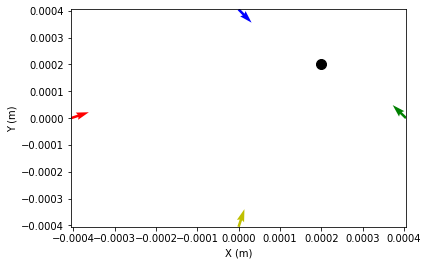

In [29]:
'''
Timeout to plot vector directions from each pole
'''
Left_Pole_Origin = [-Pole_Pole_Distance/2,0]
Top_Pole_Origin = [0,Pole_Pole_Distance/2]
Right_Pole_Origin = [Pole_Pole_Distance/2,0]
Bottom_Pole_Origin = [0,-Pole_Pole_Distance/2]


def r_vector(pole_pos, measurement_location):
    '''
    returns a 2D array fector in direction of microbot from desired pole
    '''
    x1 = pole_pos[0]
    y1 = pole_pos[1]
    
    x2 = measurement_location[0]
    y2 = measurement_location[1]
    r_vector = np.array([(x2-x1),(y2-y1)])
 
    return r_vector

def r_distance(pole_pos, measurement_location):
    '''
    returns a scalar distance desired pole to microbot
    not the normalized sistance r/L
    '''
    x1 = pole_pos[0]
    y1 = pole_pos[1]
    
    x2 = measurement_location[0]
    y2 = measurement_location[1]
    
    r_dist = (np.sqrt((x2-x1)**2 + (y2-y1)**2))
    return r_dist
   

#Assigns disances to microbot from each pole to a variable
Left_Pole_Dist = r_distance(Left_Pole_Origin, measurement_location)
Top_Pole_Dist = r_distance(Top_Pole_Origin, measurement_location)
Right_Pole_Dist = r_distance(Right_Pole_Origin, measurement_location)
Bottom_Pole_Dist = r_distance(Bottom_Pole_Origin, measurement_location)

#Assigns direction to microbot from each pole to a variable
Left_Pole_Vector = r_vector(Left_Pole_Origin, measurement_location)/Left_Pole_Dist 
Top_Pole_Vector = r_vector(Top_Pole_Origin, measurement_location)/Top_Pole_Dist
Right_Pole_Vector = r_vector(Right_Pole_Origin, measurement_location)/Right_Pole_Dist
Bottom_Pole_Vector = r_vector(Bottom_Pole_Origin, measurement_location)/Bottom_Pole_Dist

#plot microbot


plt.scatter(measurement_location[0],measurement_location[1],s=100,facecolors = "k")


    
#plot the vectors from each pole to microbot    
plt.quiver(Left_Pole_Origin[0],Left_Pole_Origin[1] ,Left_Pole_Vector[0] , Left_Pole_Vector[1],color='r', scale = None)
plt.quiver(Top_Pole_Origin[0],Top_Pole_Origin[1] ,Top_Pole_Vector[0] , Top_Pole_Vector[1],color='b',scale = None)
plt.quiver(Right_Pole_Origin[0],Right_Pole_Origin[1] ,Right_Pole_Vector[0] , Right_Pole_Vector[1],color='g',scale = None)
plt.quiver(Bottom_Pole_Origin[0],Bottom_Pole_Origin[1] ,Bottom_Pole_Vector[0] , Bottom_Pole_Vector[1],color='y',scale = None)


#plt.quiver(Left_Pole_Origin, V[0], V[1], color=['r','b','g'])
plt.xlim(-(Pole_Pole_Distance/2),(Pole_Pole_Distance/2))
plt.ylim(-(Pole_Pole_Distance/2),(Pole_Pole_Distance/2))
plt.xlabel("X (m)")
plt.ylabel("Y (m)")



where L is a 4×4 matrix ,each item of which is a vector L(j,k)=∇[(uj ·uk) (rˆjrˆk)], Q=[q1 q2 q3 q4 ] is the vector of magnetic charges, and rˆ = r/l is the normal- ized distance. Equation (6) indicates that the magnetic force is nonlinear with respect to the magnetic charge vector Q and is position dependent, as suggested by matrix L.

In [30]:
#L Matrix Calculations, The L matrix describes positional graidents from poles to mbot
"""
L is a 4x4 matri,each item of which is a vector
L = [[L11,L12,L13,L14],
    [L21,L22,L23,L24],
    [L31,L32,L33,L34],
    [L41,L42,L43,L44]]
"""
Ll= np.array([[1,1,2,4],
    [1,1,2,4],
    [1,1,2,4],
    [1,1,2,4]])

Q1 = np.array([[1],[1],[1],[1]])




L_matrix = []

r_dist = [Left_Pole_Dist,Top_Pole_Dist,Right_Pole_Dist,Bottom_Pole_Dist]

r_vect_j = [Left_Pole_Vector,Top_Pole_Vector,Right_Pole_Vector,Bottom_Pole_Vector]
r_vect_k = [Left_Pole_Vector,Top_Pole_Vector,Right_Pole_Vector,Bottom_Pole_Vector]


for j in r_vect_j:
    for k in r_vect_k:
        
        rdj = (np.linalg.norm(j))
        rdk = (np.linalg.norm(k))
        
        coef = 1/((rdj**3)*(rdk**3))
        
        Leftside = (1- (3*(np.dot(j,k))/(rdk**2)))*k
        Rightside = (1- (3*(np.dot(j,k))/(rdj**2)))*j
        
        L = coef * (Leftside + Rightside)
        
        L_matrix.append(L)
        
        
L_matrix_nump = np.array(L_matrix).reshape((4,4,2))
print("L matrix = \n", L_matrix_nump)

L matrix = 
 [[[-3.79786024 -1.25549099]
  [-0.51923304  0.12664519]
  [ 0.55646384  2.41031883]
  [-0.99559513 -0.99559513]]

 [[-0.51923304  0.12664519]
  [-2.79329541  2.86312779]
  [-0.06981642 -0.06981642]
  [ 2.41031883  0.55646384]]

 [[ 0.55646384  2.41031883]
  [-0.06981642 -0.06981642]
  [ 2.86312779 -2.79329541]
  [ 0.12664519 -0.51923304]]

 [[-0.99559513 -0.99559513]
  [ 2.41031883  0.55646384]
  [ 0.12664519 -0.51923304]
  [-1.25549099 -3.79786024]]]


Fx [[-0.00013113]]
Fy [[-0.00013296]]


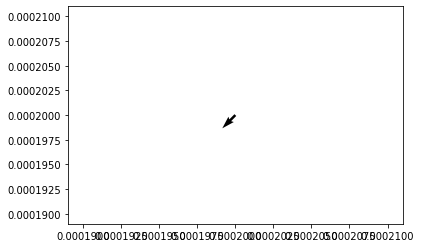

In [31]:
#F Matrix Calculations, TThe magnetic force on the magnetic bead 
"""
F = (kq) * Fq_vect

where Fq_vect  = Q.transpose *L * Q
"""
Ra = (1.8*(10**9))



#matrix KI is the distribution matrix of the magnetic flux.
KI = np.array([[3/4, -1/4, -1/4, -1/4],  
              [-1/4, 3/4, -1/4, -1/4],
              [-1/4, -1/4, 3/4, -1/4],
              [-1/4, -1/4, -1/4, 3/4]])

I_matrix = np.array([I1,I2,I3,I4])

Q_Matric_Const = (NTurns/(perm0*Ra))
Qmatrix = np.array([Q_Matric_Const * (KI @ I_matrix)])

L_matrix_nump_X = L_matrix_nump[:,:,0]
L_matrix_nump_Y = L_matrix_nump[:,:,1]

Fx = np.matmul(np.matmul(Qmatrix,   L_matrix_nump_X) , Qmatrix.transpose())
Fy = np.matmul(np.matmul(Qmatrix,   L_matrix_nump_Y) , Qmatrix.transpose())
print("Fx", Fx)
print("Fy", Fy)

plt.quiver(measurement_location[0],measurement_location[1] ,Fx, Fy,color='k', scale = None)




#I Matrix stuff


      